# DSCI 572 lecture 8


In [12]:
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The plan:

- True/False (35 min)
- Lab 4 recap: using pre-trained networks (5 min)
- Break (10 min)
- More deep learning (20 min, optional)
- Troubleshooting for supervised learning (10 min, optional)

## True/False on CNNs (25min)

1. In fully-connected networks, we had a **vector** (or 1D array) of activations at each layer (i.e. $x^{(l)}$; a column of circles in our diagram). With 1D convnets, we need a **matrix** (or 2D array) to represent our activations at each layer.
2. The **input** to a `Conv2D` layer is a 2D image.
3. The **output** of a `Conv2D` layer is a 2D image.
4. The **parameters** of a `Conv2D` layer form a 4D array.
5. Imagine we transposed the input to a `Conv1D` layer, making it $d\times T$ instead of $T \times d$. We pass it through the layer, and then transpose the output. Does this give the same result as the original (no transposing)?

<br><br><br><br><br><br><br><br><br>


1. Pooling reduces the number of activations at a given layer. 
2. Pooling introduces new hyperparameters, but not new parameters, into the model.
3. Adding more dense layers at the end of a network always increases the number of parameters of a convnet.
4. Adding more convolutional layers at the start always increases the number of parameters of a convnet.

<br><br><br><br><br><br><br><br><br>

## Using pre-trained networks - recap (5 min)

- In the lab you did transfer learning.
- You can also do something simpler, which is to use the pre-trained model right out of the box.
- Keras has a bunch of pre-trained models available, see [here](https://keras.io/applications/).

In [13]:
# from the Keras documentation (link above)
model = ResNet50(weights='imagenet')

Note the important distinction between the choice of architecture (in this case, `ResNet50`) and the choice of dataset (in this case, ImageNet).

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

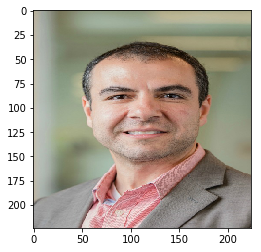

In [15]:
img_path = 'milad.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img);

In [16]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04591157', 'Windsor_tie', 0.2905446), ('n04350905', 'suit', 0.24855626), ('n03763968', 'military_uniform', 0.08951188)]


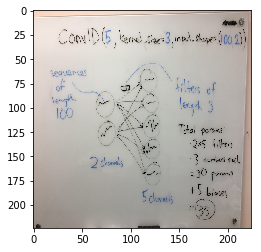

In [17]:
img_path = 'Conv1D.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img);

In [18]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n07565083', 'menu', 0.535325), ('n03291819', 'envelope', 0.23931558), ('n02840245', 'binder', 0.07762122)]


- Often pre-trained networks are quite useful.
- 2017 MDS Capstone project student, when asked what part was "surprisingly easy" anwered that a pre-trained model did a good job of sentiment analysis for their task.

-----------
Everything after this point is **optional**.

----------

## Break (10 min)

- We are supposed to set aside time in lecture for you to fill out the UBC teaching evaluations for the course.
- For more info on how these get used, see the bottom section of [this document](https://ubc-mds.github.io/resources_pages/student_feedback/).
- Feel free to do so now if you'd like; I won't walk behind you and look at your screens!
- Evaluation link: https://eval.ctlt.ubc.ca/science

## A bunch of random things about deep learing (30 min)

#### Visualizing filters

- This is something people love to do
- Often see something similar to [Gabor filters](https://en.wikipedia.org/wiki/Gabor_filter) from human visual system
- See AlexNet paper linked below, Figure 3.
- The low layers are often similar in a lot of models
  - Maybe we only need to retrain later layers when transferring to different tasks?

#### Famous architectures

- Historically: Neocognitron, LeNet, HMAX
- More recently:
  - [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) (named after Alex Krizhevsky) set a standard in 2012 (15.4% error vs. 26.2% for closest competitor on [ImageNet](https://en.wikipedia.org/wiki/ImageNet)).
  - [Inception / GoogLeNet](https://arxiv.org/pdf/1409.4842.pdf) (pun on Google & LeNet), 2014, 22 layers 
  - [VGGNet](https://arxiv.org/pdf/1409.1556.pdf) (2014)
  - [Generative Adversarial Networks (GANs)](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) (2014)
  - [ResNet](https://arxiv.org/abs/1512.03385) (2015)
  - [DenseNet](https://arxiv.org/pdf/1608.06993v3.pdf) (2016)
  - I guess my slides are already out of date if they end at 2016...
  
AlexNet:

- 5 convolutional layers.
- 3 fully-connected layers.
- SGD with momentum.
- ReLU activation functions.
- Data translation/reflection/cropping.
- L2-regularization + dropout.
- 5-6 days on two GPUs

#### Data sets

- There tend to be trendy datasets that evolve over time as the field proceeds. 
- For an example of the focus on a single data set, see this [compilation of MNIST results](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html).
- This is good because people can compare with each other.
- But also bad because these data sets may not be important and we may overfit on them (optimization bias as a whole field of researchers).
  - There have been [disturbing findings](http://people.csail.mit.edu/torralba/research/bias/) about the limited transferability of models/insights to new data sets.


#### Preprocessing and initialization

- Preprocessing is how we handle the _data_; initialization refs to our initial guess at the _parameters_ before optimizing. 
- They are also related to each other because the scale of the data affects the scale of the parameters (think of linear regression).

Preprocessing (about $X$ and $y$)

- Standardization/normalization is a good idea for deep learning.
- Some methods are not independent across features: e.g. PCA for preprocessing, other methods like [whitening](http://deeplearning.stanford.edu/wiki/index.php/Whitening).

Initialization (about $W$)

- Sigmoids units are sensitive to initialization, ReLU less so.
- Overall initialization matters _a lot_.
- Cannot just initialize to zero because then gradient will be zero. Other pathologies too, like cannot initialize all weights to the same value.
- Keras offers [a bunch of initialization options](https://keras.io/initializations/), you may need to experiment a bit. You can view it as just another hyperparameter.
  - Speaking of which...

#### Hyperparameter optimization

- We are left with a lot of hyperparameters. Hyperparameter optimization now becomes important. 
- One important choice is the number of size/layers. Some prefer "wide" and others prefer "deep" nets. 
- A specification of these is called the network _architecture_ and searching for the best one is sometimes called **architecture search**.
- Currently, we don't go into this much in MDS (just whatever is in DSCI 573). 
- However, I can recommend two useful tools:
  - Random search, as in scikit-learn's [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - Something smarter, which could be Bayesian optimization. I recommend [`scikit-optimize`](https://scikit-optimize.github.io/). (Note: not to be confused with `scipy.optimize`!)
  

#### Autoencoders

- Unsupervised learning by minimizing _reconstruction loss_.
- We've usually associated loss functions with supervised learning, but actually several unsupervised methods like PCA and $k$-means clustering can be thought of us minimizing the reconstruction error.
  - See optional question in 563 lab about PCA as a special case of a neural network (autoencoder).
- Autoencoders are neural nets that try to reconstruct the input examples.
- Squeeze the information through an "information bottleneck".
- Autoencoders automatically learn _compressed_ representations.
- Strong connection between compression and unsupervised learning (especially the lossy part of compression).

#### Types of neural networks

- Fully-connected (`Dense` in Keras)
- Convolutional  (e.g. `Conv2D` in Keras)
- Recurrent (including LSTM, e.g. `LSTM` in Keras)
  - This is as opposed to feedforward (`Sequential` in Keras)
  - Coming in DSCI 575.
- Recursive (apparently a more general case of recurrent, acronym "RNN" usually refers to recurrent)
- Others...

#### GPUs and parallel processing

- Breakdown of [Moore's law](https://en.wikipedia.org/wiki/Moore%27s_law).
- NVIDIA is the market leader in making GPUs. 
- What parts are parallelizable?
  - Matrix multiplication.
  - Per-example gradients in an SGD minibatch (e.g. if `batch_size=128`, can be parallelized over 128 threads).
  - Some parts need to be iterative, like the high-level GD/SGD steps.

#### AI safety and adversarial examples

- See this [OpenAI blog post](https://blog.openai.com/adversarial-example-research/).
- If the input is a $1000\times 1000$ image, the input space is so big.
  - it is hard to imagine all the possible perturbations, so some of them work out.
- Maybe more of this coming in DSCI 541.

#### What didn't we cover in this course?

- A ton of stuff, of course, including...
  - Reinforcement learning (e.g. AlphaGo)
  - RNNs (DSCI 575)
  - at-scale considerations, distributed computing (beyond DSCI 525)
  - ~~transfer learning~~ (covered as of 2019!)
  - interpretability of deep learning [(recent article)](https://distill.pub/2018/building-blocks/)
  - Bayesian neural nets
  - [GANs](https://en.wikipedia.org/wiki/Generative_adversarial_network)
  - much more...
  
For more information, see the various resources on the course README.

## Troubleshooting for supervised learning (10 min)

- My model doesn't work, what do I do next?
- First thing I would do is look at the training error and validation error.
  - Training error is high: am I underfitting?
  - Big gap between train/test: am I overfitting? 
  - New thing to worry about if training error is high: is my optimization working?

Below is a list of problems you might encounter, which I've vaguely ranked from most to least common in practice.

#### Fundamental learning issues:

- Did I overfit? 
- Did I underfit?
- Did I reach the "irreducible error"?
- Do I need more data? Try training on more or less data and see what happens.
- Do I need better data?
- Did I overfit on the validation set?
- Do I need to select methods more appropriate to my data type (time series, sequences, images, graphs, etc)?

#### Data preparation issues

- Do I have data quality problems?
- Did I preprocess my data in a sensible way?
- What about missing data?
- Are my features reasonable?

#### Loss function issues:

- Does my loss function capture my idea of a "good" model? 

#### Speed issues:

- Is my training procedure too slow to be useful?
- Is my prediction/inference procedure too slow to be useful?
- Is my entire pipeline too slow to support rapid prototyping?

#### Optimization issues:

- Did my optimization not converge? Try plotting training error vs. iterations.
- Was it an initialization problem?
- Did I reach a local minimum? Saddle point?


### That's all, folks!

- This is my last lecture in the program. But I'll be involved with Capstone.
- Thank you for putting your trust in the MDS program. I believe it will be well-placed for most of you.